In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# налаштування 
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:
# Навчання автокодувальника
history = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.2967 - val_loss: 0.1447
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1394 - val_loss: 0.1255
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1246 - val_loss: 0.1172
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1169 - val_loss: 0.1125
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1128 - val_loss: 0.1090
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1097 - val_loss: 0.1068
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1071 - val_loss: 0.1051
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1056 - val_loss: 0.1033
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1038 - val_loss: 0.1016
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1026 - val_loss: 0.1020
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1018 - val_loss: 0.1000
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 

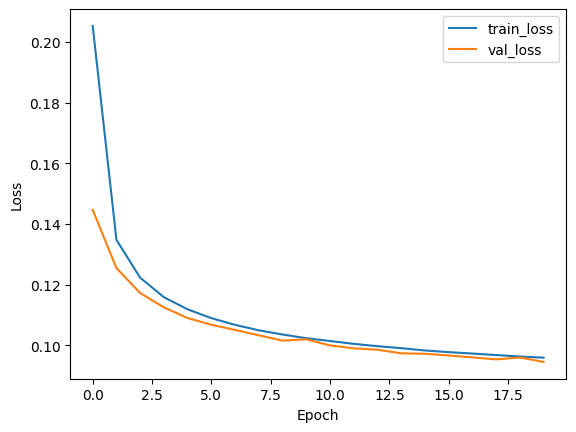

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


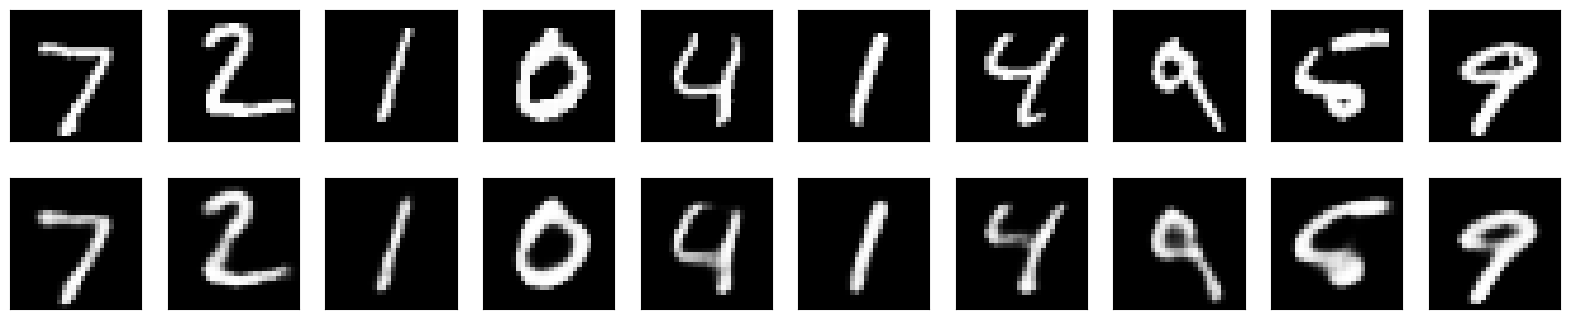

In [4]:
#результат
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
decoded_imgs = autoencoder.predict(x_test)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
#Висновок: серед трьох моделей , спираючись на візуальний аналіз зображенеь - результатів, ця модель мала найбілшу проблему з аналізом цифри "6" , проте  з іншими впоралась набагато краще за інші, на мою думку, 
#збільшивши кількість епох, та давши пропрацювати проблемні дані(таргетне тренування моделі) результат буде найкращим серед трьох та близький до потрібного